In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Any results you write to the current directory are saved as output.

/kaggle/input/property-prices-in-tunisia/Property Prices in Tunisia.csv


In [2]:
df=pd.read_csv("/kaggle/input/property-prices-in-tunisia/Property Prices in Tunisia.csv")

In [3]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [4]:
col=['room_count','bathroom_count','size', 'price','log_price']
df.mask(df[col] < 0,inplace=True)

In [5]:
df[col]=df[col].astype(np.float32)

In [6]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,NaN,NaN,NaN,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,NaN,NaN,NaN,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12748 entries, 0 to 12747
Data columns (total 9 columns):
category          12748 non-null object
room_count        9333 non-null float32
bathroom_count    9333 non-null float32
size              9333 non-null float32
type              12748 non-null object
price             12748 non-null float32
city              12748 non-null object
region            12748 non-null object
log_price         12748 non-null float32
dtypes: float32(5), object(4)
memory usage: 647.5+ KB


In [8]:
df.dropna(inplace=True)

Убрал -1

In [9]:
df.head()

,category,room_count,bathroom_count,size,type,price,city,region,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,Ariana,Autres villes,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,Ariana,Borj Louzir,2.826075


In [10]:
df.drop(["city","region"], axis=1,inplace=True)

In [11]:
df.head()

,category,room_count,bathroom_count,size,type,price,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,5.230449
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,2.826075


In [12]:
X = pd.get_dummies(df.drop(columns=['price','log_price'])).values
y = df.price.values

In [13]:
df.describe()

,room_count,bathroom_count,size,price,log_price
count,9333.000000,9333.000000,9333.000000,9.333000e+03,9333.000000
mean,2.769420,1.403836,179.157822,8.095145e+06,4.031662
std,1.622957,0.798164,193.875702,5.712810e+08,1.419874
min,1.000000,0.000000,20.000000,1.000000e+01,1.000000
25%,2.000000,1.000000,83.000000,6.000000e+02,2.778151
50%,3.000000,1.000000,120.000000,3.200000e+03,3.505150
75%,3.000000,2.000000,198.000000,2.200000e+05,5.342422
max,20.000000,10.000000,2000.000000,5.500000e+10,10.740363


In [14]:
X_train.shape

NameError: name 'X_train' is not defined

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [16]:
df[df.city=="Kébili"]

AttributeError: 'DataFrame' object has no attribute 'city'

<center>Polynomial Regression</center>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_train,y_poly_pred))
r2 = r2_score(y_train,y_poly_pred)
print("RMSE",rmse)
print("R2",r2)

RMSE 636881800.0
R2 0.005133779105480518


<center>SVR<center>

In [19]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  882799020470447.0 
r2_score:  -0.0026688468077136207


In [22]:
pd.DataFrame(y_pred).describe()

,0
count,1.867000e+03
mean,9.017269e+04
std,1.374441e+05
min,-2.799726e+04
25%,1.991217e+04
50%,4.442665e+04
75%,9.953709e+04
max,1.363127e+06


In [23]:
import statsmodels.api as sm
X_1=sm.add_constant()
ols_regr = sm.OLS(endog = y_train, exog = X_1).fit()

TypeError: add_constant() missing 1 required positional argument: 'data'

In [24]:
col_names = ['const']+pd.get_dummies(df.drop(["price","log_price"], axis=1)).columns.tolist()

In [25]:
ols_regr.summary(xname=col_names, yname='Price')

NameError: name 'ols_regr' is not defined

In [26]:
pd.get_dummies(df.drop(columns=['price','log_price'])).drop("category_Colocations",axis=1).values.shape

(9333, 10)

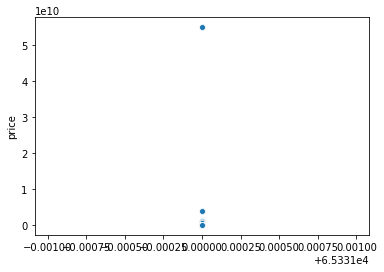

In [27]:
import seaborn as sns
sns.scatterplot(df.size,df.price)

In [28]:
df.head()

,category,room_count,bathroom_count,size,type,price,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,5.230449
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,2.826075


In [29]:
df_arenda=df[df.type=="À Louer"]
df_prodaja=df[df.type=="À Vendre"]

In [30]:
df_arenda["size"].value_counts()

100.0    578
120.0    373
80.0     348
70.0     291
150.0    260
        ... 
234.0      1
254.0      1
178.0      1
890.0      1
570.0      1
Name: size, Length: 244, dtype: int64

In [31]:
np.percentile(df_arenda["size"].values,[1,99])

array([  30., 1000.])

In [32]:
df_arenda["price"].describe()

count    4.990000e+03
mean     4.506487e+04
std      1.147147e+06
min      1.000000e+01
25%      3.800000e+02
50%      6.500000e+02
75%      1.100000e+03
max      5.868130e+07
Name: price, dtype: float64

In [33]:
np.percentile(df_arenda["price"].values,[1,99])

array([4.500e+01, 1.811e+05])

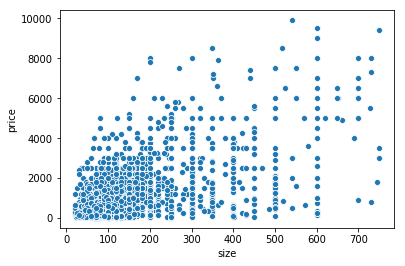

In [34]:
sns.scatterplot(df_arenda[(df_arenda["size"]<800) & (df_arenda["price"]<10000)]["size"],df_arenda[(df_arenda["size"]<800) & (df_arenda["price"]<10000)]["price"])

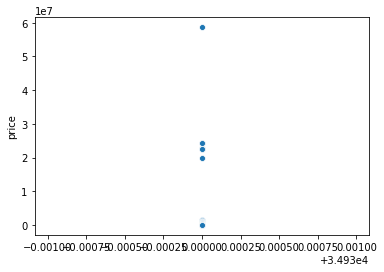

In [35]:
sns.scatterplot(df_arenda.size,df_arenda.price)

In [36]:
import statsmodels.api as sm
X_1=pd.get_dummies(df.drop(columns=['price','log_price'])).drop(["category_Colocations","category_Locations de vacances","category_Bureaux et Plateaux","category_Appartements","room_count","type_À Louer","category_Maisons et Villas","type_À Vendre","bathroom_count"],axis=1).values
ols_regr = sm.OLS(endog = df.price.values, exog = X_1).fit()

col_names = pd.get_dummies(df.drop(["price","log_price"], axis=1)).drop(["category_Colocations","category_Locations de vacances",'category_Bureaux et Plateaux',"category_Appartements","room_count","type_À Louer","category_Maisons et Villas","type_À Vendre","bathroom_count"],axis=1).columns.tolist()

ols_regr.summary(xname=col_names, yname='Price')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1018: RuntimeWarning: overflow encountered in square
  s = s**2


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              8.882
Date:                Fri, 27 Mar 2020   Prob (F-statistic):                    0.000140
Time:                        05:41:34   Log-Likelihood:                     -2.0142e+05
No. Observations:                9333   AIC:                                  4.028e+05
Df Residuals:                    9331   BIC:                                  4.029e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
size                                                3.822e+04   2.29e+04      1.671      0.095   -6609.570    8.31e+04
category_Magasins, Commerces et Locaux industriels  7.872e+07   2.29e+07      3.444      0.001    3.39e+07    1.24e+08
==============================================================================
Omnibus:                    37236.237   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                  inf
Skew:                          95.434   Prob(JB):                         0.00
Kurtosis:                         inf   Cond. No.                     1.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
df.head()

,category,room_count,bathroom_count,size,type,price,log_price
2,Appartements,2.0,1.0,80.0,À Louer,380.0,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,5.230449
5,Locations de vacances,1.0,1.0,70.0,À Louer,80.0,1.903090
6,Appartements,2.0,1.0,100.0,À Louer,670.0,2.826075


In [38]:
col_names = ['const']+pd.get_dummies(df.drop(["price","log_price"], axis=1)).columns.tolist()

In [39]:
ols_regr.summary(xname=col_names, yname='Price')

ValueError: xnames and params do not have the same length

R2 score тут другой для SVR

<center>Decision Tree<center>

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [41]:
y_pred = regressor.predict(X_test)

In [42]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  1351608944742965.5 
r2_score:  -0.5351355750691928


<center>Random Forest<center>

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [44]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred))

mean_squared_error:  6.471790575914136e+16 
r2_score:  -72.50555044878514


In [47]:
X_1=sm.add_constant(X_train)
ols_regr = sm.OLS(endog = y_train, exog = X_1).fit()

In [48]:
col_names = ['const']+pd.get_dummies(df.drop(["price","log_price"], axis=1)).columns.tolist()

In [49]:
ols_regr.summary(xname=col_names, yname='Log_Price')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.190
Date:                Fri, 27 Mar 2020   Prob (F-statistic):             0.0199
Time:                        05:41:47   Log-Likelihood:            -1.6195e+05
No. Observations:                7466   AIC:                         3.239e+05
Df Residuals:                    7456   BIC:                         3.240e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                1.34e+07   1.41e+07      0.948      0.343   -1.43e+07    4.11e+07
room_count                                          2.237e+06   6.32e+06      0.354      0.723   -1.01e+07    1.46e+07
bathroom_count                                     -1.489e+07   1.21e+07     -1.229      0.219   -3.86e+07    8.86e+06
size                                                9.281e+04   4.66e+04      1.993      0.046    1506.782    1.84e+05
category_Appartements                              -1.423e+07   1.83e+07     -0.779      0.436      -5e+07    2.16e+07
category_Bureaux et Plateaux                       -1.319e+07    3.3e+07     -0.399      0.690   -7.79e+07    5.16e+07
category_Colocations                               -8.084e+06   7.32e+07     -0.110      0.912   -1.52e+08    1.35e+08
category_Locations de vacances                     -7.043e+06   3.78e+07     -0.187      0.852    -8.1e+07     6.7e+07
category_Magasins, Commerces et Locaux industriels  8.386e+07   2.88e+07      2.908      0.004    2.73e+07     1.4e+08
category_Maisons et Villas                         -2.792e+07   2.14e+07     -1.303      0.193   -6.99e+07    1.41e+07
type_À Louer                                       -3.375e+06   9.31e+06     -0.362      0.717   -2.16e+07    1.49e+07
type_À Vendre                                       1.677e+07   1.19e+07      1.414      0.157   -6.48e+06       4e+07
==============================================================================
Omnibus:                    28254.770   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      16729490413.059
Skew:                          85.290   Prob(JB):                         0.00
Kurtosis:                    7334.375   Cond. No.                     7.72e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.72e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""